In [2]:
#importing the essential Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Load the dataset
crime_data = pd.read_csv('china_crime_sample_data.csv')

In [4]:
crime_data.head()

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Unknown,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Unknown,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Unknown,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,NaN,23.120373,116.131223


In [5]:
crime_data.tail()

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Unknown,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Unknown,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,NaN,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,NaN,39.004747,101.141094
999,2000,Burglary,Chengdu,2024-12-31,23:59,28,42,NaN,28.920115,105.643742


## S1 : DATA CLEANING

In [8]:
# Checking for missing values
missing_values = crime_data.isnull().sum()
print(missing_values)

Crime_ID         0
Crime_Type       0
Location         0
Date             0
Time             0
Victim_Age       0
Suspect_Age      0
Weapon_Used    198
Latitude         0
Longitude        0
dtype: int64


In [16]:
# we are having null values in Weapon_used column as 198 so lets remove it
missing_values.fillna(method='bfill', inplace=True)

# Converting the 'Date' column to datetime format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%Y-%m-%d')

# Checking for duplicated entries
duplicates = crime_data.duplicated().sum()

# Dropping the duplicated rows if found

crime_data_cleaned = crime_data.drop_duplicates()

# Optionally, reset the index
crime_data_cleaned = crime_data_cleaned.reset_index(drop=True)

# Display the results of missing values and duplicates
missing_values, duplicates


C:\Users\pc\AppData\Local\Temp\ipykernel_16932\1177062714.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  missing_values.fillna(method='bfill', inplace=True)


(Crime_ID         0
 Crime_Type       0
 Location         0
 Date             0
 Time             0
 Victim_Age       0
 Suspect_Age      0
 Weapon_Used    198
 Latitude         0
 Longitude        0
 dtype: int64,
 0)

In [17]:
crime_data.isnull().sum()

Crime_ID       0
Crime_Type     0
Location       0
Date           0
Time           0
Victim_Age     0
Suspect_Age    0
Weapon_Used    0
Latitude       0
Longitude      0
dtype: int64

In [18]:
missing_values.isnull().sum()

0

In [19]:
# Checking if other categorical columns need labeling (e.g., 'Weapon_Used')
crime_data['Weapon_Used'] = crime_data['Weapon_Used'].astype('category')

In [20]:
crime_data.head()

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
0,1001,Burglary,Shenzhen,2024-01-01,00:00,63,30,Unknown,27.490802,103.702659
1,1002,Fraud,Wuhan,2024-01-01,00:01,47,59,Unknown,39.014286,110.838019
2,1003,Burglary,Beijing,2024-01-01,00:02,57,20,Unknown,34.639879,117.458917
3,1004,Assault,Chongqing,2024-01-02,00:04,35,26,Knife,31.973170,114.644498
4,1005,Assault,Shenzhen,2024-01-02,00:05,68,29,Knife,23.120373,116.131223


In [21]:
crime_data.tail()

,Crime_ID,Crime_Type,Location,Date,Time,Victim_Age,Suspect_Age,Weapon_Used,Latitude,Longitude
995,1996,Fraud,Chengdu,2024-12-29,23:53,18,61,Unknown,21.831641,113.139103
996,1997,Vandalism,Xi'an,2024-12-29,23:54,37,57,Unknown,38.346272,119.132292
997,1998,Assault,Guangzhou,2024-12-30,23:56,39,35,Unknown,22.736373,101.379160
998,1999,Fraud,Guangzhou,2024-12-30,23:57,65,51,Unknown,39.004747,101.141094
999,2000,Burglary,Chengdu,2024-12-31,23:59,28,42,Unknown,28.920115,105.643742


In [23]:
crime_data['Weapon_Used'].unique()

['Unknown', 'Knife', 'Gun', 'Bat']
Categories (4, object): ['Bat', 'Gun', 'Knife', 'Unknown']

In [24]:
# Saving the dataset after clearing the duplicates and missing values

crime_data_cleaned.to_csv('cleaned_china_crime_data.csv', index=False)


## S2 : Exploratory Data Analysis

Location
Beijing      147
Guangzhou    139
Chengdu      129
Shanghai     122
Xi'an        118
Wuhan        117
Chongqing    116
Shenzhen     112
Name: count, dtype: int64


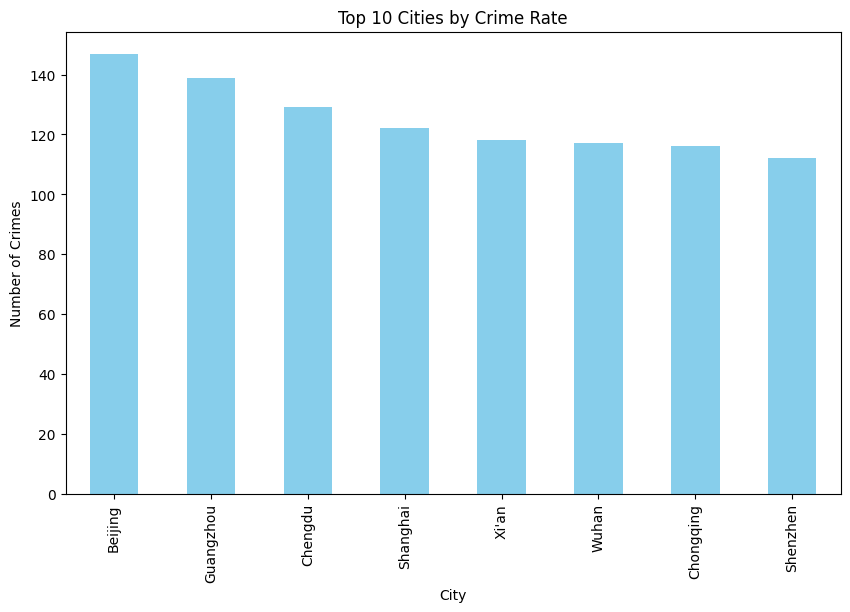

In [35]:
# Crime frequency by location (city/province)
crime_by_location = crime_data['Location'].value_counts()
print(crime_by_location)

# Plotting cities with the highest crime rates
plt.figure(figsize=(10,6))
crime_by_location.head(10).plot(kind='bar', color='skyblue', title='Top 10 Cities by Crime Rate')
plt.ylabel('Number of Crimes')
plt.xlabel('City')
plt.show()

Crime_Type
Burglary     213
Theft        209
Fraud        203
Vandalism    200
Assault      175
Name: count, dtype: int64


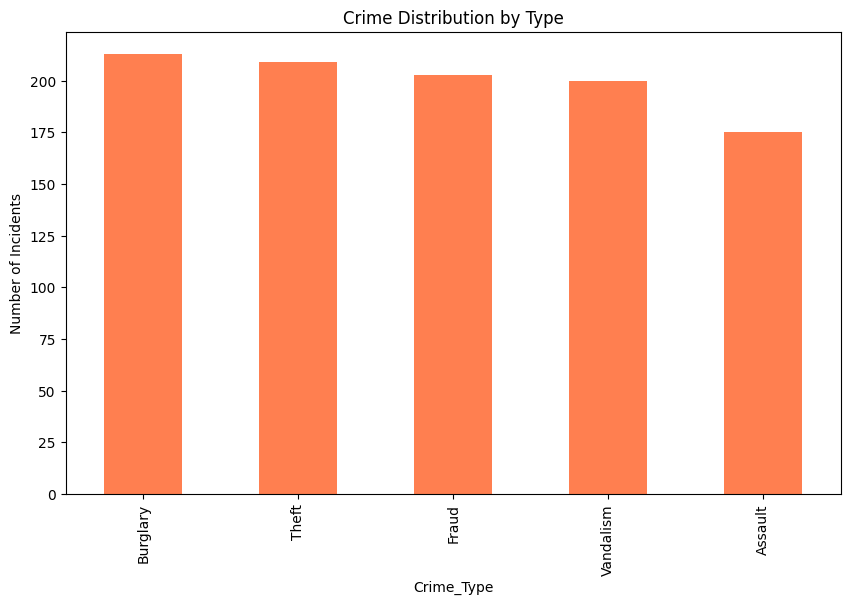

In [36]:
# Crime frequency by type
crime_by_type = crime_data['Crime_Type'].value_counts()
print(crime_by_type)

# Plotting crime distribution by type
plt.figure(figsize=(10,6))
crime_by_type.plot(kind='bar', color='coral', title='Crime Distribution by Type')
plt.ylabel('Number of Incidents')
plt.show()


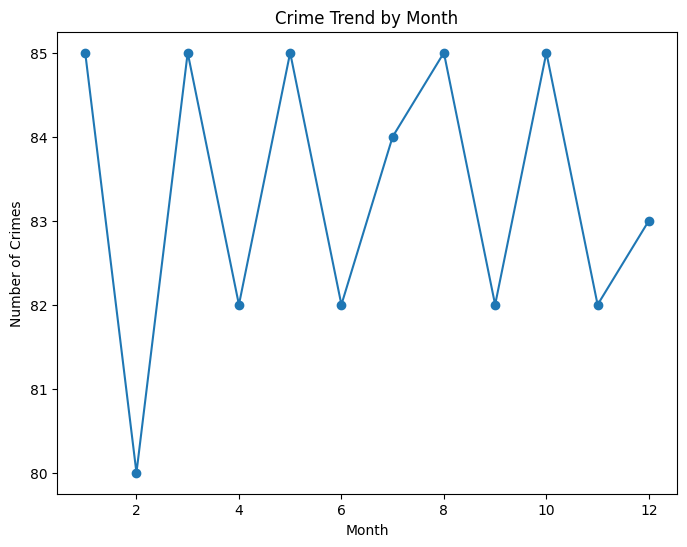

In [37]:
# Find trends over months, days, or hours of the day
# Trend by month
crime_data['Month'] = crime_data['Date'].dt.month
month_trend = crime_data.groupby('Month')['Crime_Type'].count()

plt.figure(figsize=(8,6))
month_trend.plot(kind='line', marker='o', title='Crime Trend by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.show()

0       0
1       0
2       0
3       0
4       0
       ..
995    23
996    23
997    23
998    23
999    23
Name: Hour, Length: 1000, dtype: int32
24


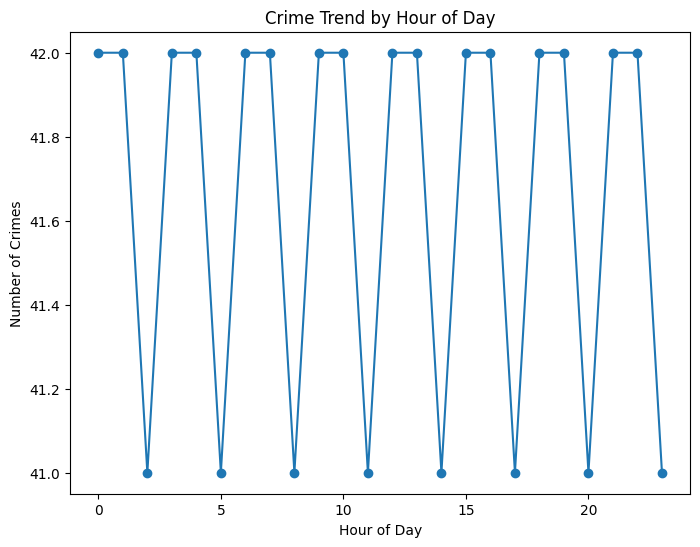

In [38]:
# Extract the hour from the 'Time' column for time-based analysis
crime_data['Hour'] = pd.to_datetime(crime_data['Time'], format='%H:%M').dt.hour
hour_trend = crime_data.groupby('Hour')['Crime_Type'].count()
print(crime_data['Hour'])

print(crime_data['Hour'].nunique())

plt.figure(figsize=(8,6))
hour_trend.plot(kind='line', marker='o', title='Crime Trend by Hour of Day')
plt.ylabel('Number of Crimes')
plt.xlabel('Hour of Day')
plt.show()

In [30]:
# Crime frequency by hour of the day
crime_by_hour = crime_data['Hour'].value_counts().sort_index()
print(crime_by_hour)

Hour
0     42
1     42
2     41
3     42
4     42
5     41
6     42
7     42
8     41
9     42
10    42
11    41
12    42
13    42
14    41
15    42
16    42
17    41
18    42
19    42
20    41
21    42
22    42
23    41
Name: count, dtype: int64


## S3: Using Geopandas Library for Plotting Crime Locations on Map

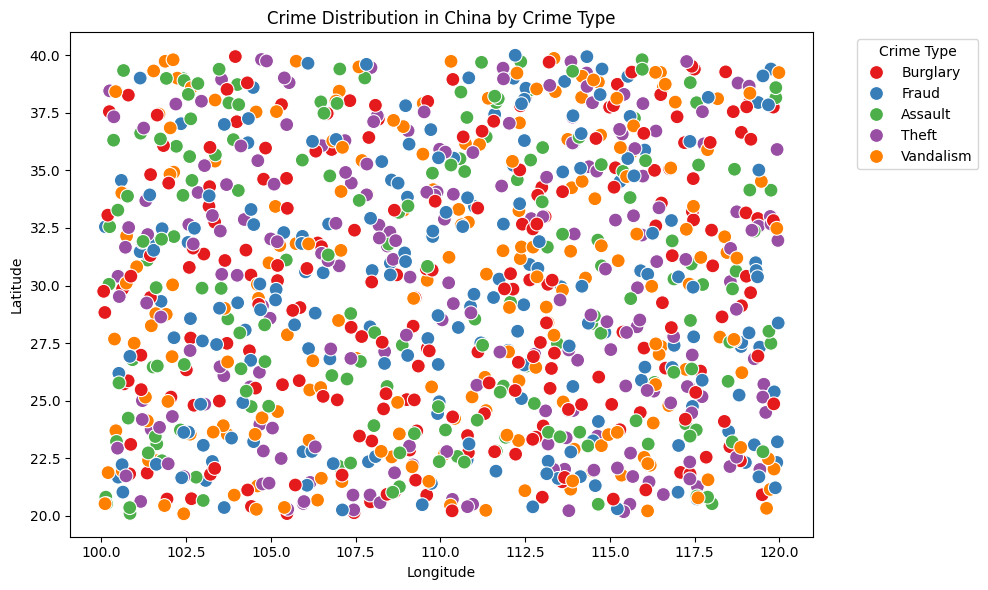

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot using latitude and longitude
sns.scatterplot(x='Longitude', y='Latitude', data=crime_data, hue='Crime_Type', palette='Set1', s=100)

# Adding title and labels
plt.title('Crime Distribution in China by Crime Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

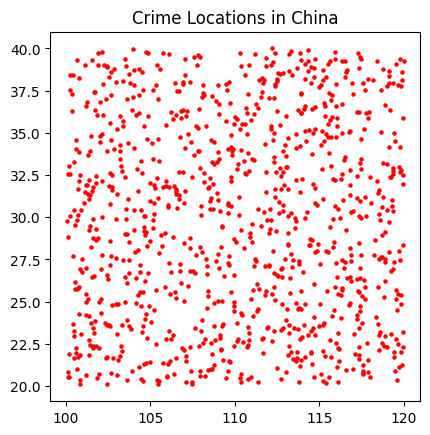

In [40]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(crime_data, geometry=gpd.points_from_xy(crime_data.Longitude, crime_data.Latitude))

# Plot crime locations on map
plt.figure(figsize=(10,8))
gdf.plot(marker='o', color='red', markersize=5)
plt.title('Crime Locations in China')
plt.show()

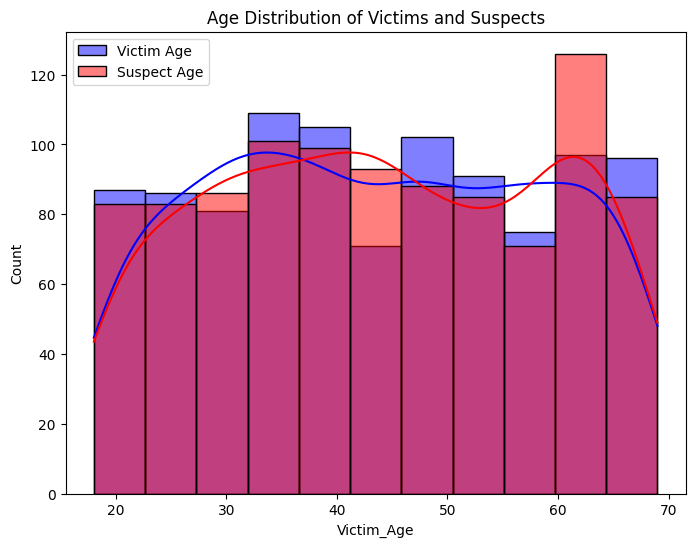

In [39]:
# plotting Heat maps

plt.figure(figsize=(8,6))
sns.histplot(crime_data['Victim_Age'], kde=True, color='blue', label='Victim Age')
sns.histplot(crime_data['Suspect_Age'], kde=True, color='red', label='Suspect Age')
plt.title('Age Distribution of Victims and Suspects')
plt.legend()
plt.show()

In [46]:
import pandas as pd
import folium
from folium.plugins import HeatMap
# Initialize a map centered around a location (China)
crime_map = folium.Map(location=[35.8617, 104.1954], zoom_start=5)

# Add markers for each crime location
for index, row in crime_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Crime: {row['Crime_Type']}, Location: {row['Location']}",
        icon=folium.Icon(color='red' if row['Crime_Type'] == 'Assault' else 'blue')
    ).add_to(crime_map)

# Save the map to an HTML file or display it directly in Jupyter
crime_map.save('crime_map_china.html')
crime_map

In [47]:
#Creating  a Crime Heatmap by Crime Type

# Filter for a specific crime type (e.g., 'Assault')
assault_data = crime_data[crime_data['Crime_Type'] == 'Assault']

# Create a new map for assault crimes
assault_heatmap = folium.Map(location=[35.8617, 104.1954], zoom_start=5)

# Prepare data for heatmap
assault_heat_data = [[row['Latitude'], row['Longitude']] for index, row in assault_data.iterrows()]

# Add heatmap layer for assault crimes
HeatMap(assault_heat_data).add_to(assault_heatmap)

# Save or display the heatmap
assault_heatmap.save('assault_heatmap_china.html')
assault_heatmap


In [48]:
# Filter for a specific crime type (e.g., 'Assault')
burglary_data = crime_data[crime_data['Crime_Type'] == 'Burglary']

# Create a new map for assault crimes
burglary_heatmap = folium.Map(location=[35.8617, 104.1954], zoom_start=5)

# Prepare data for heatmap
burglary_heat_data = [[row['Latitude'], row['Longitude']] for index, row in assault_data.iterrows()]

# Add heatmap layer for assault crimes
HeatMap(burglary_heat_data).add_to(burglary_heatmap)

# Save or display the heatmap
assault_heatmap.save('burglary_heatmap_china.html')
assault_heatmap


## K-Means Clustering (Crime Location Patterns)

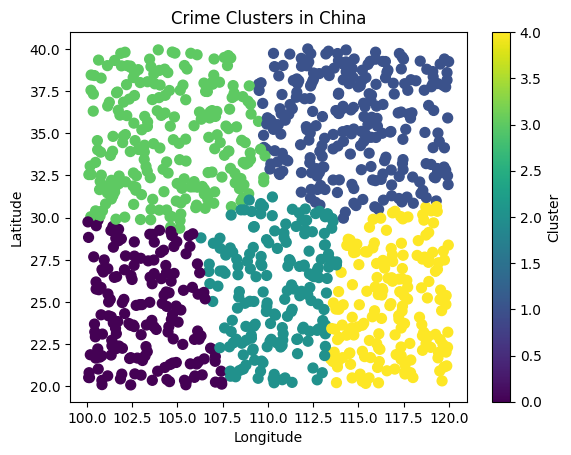

In [50]:
# Convert 'Crime_Type' into numerical values for clustering
crime_data['Crime_Type_Num'] = crime_data['Crime_Type'].astype('category').cat.codes

# Prepare the data for clustering
clustering_data = crime_data[['Latitude', 'Longitude', 'Crime_Type_Num']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
crime_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualize the clusters
plt.scatter(crime_data['Longitude'], crime_data['Latitude'], c=crime_data['Cluster'], cmap='viridis', s=50)
plt.title('Crime Clusters in China')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label= 'Cluster')
plt.show()

## Analysing through Time-series module

C:\Users\pc\AppData\Local\Temp\ipykernel_16932\1057905238.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_by_month = crime_data.resample('M', on='Date').size()


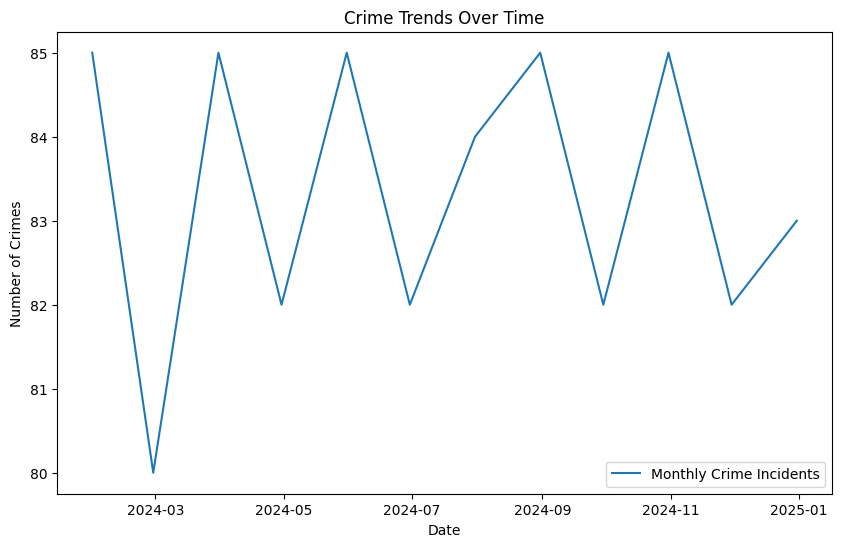

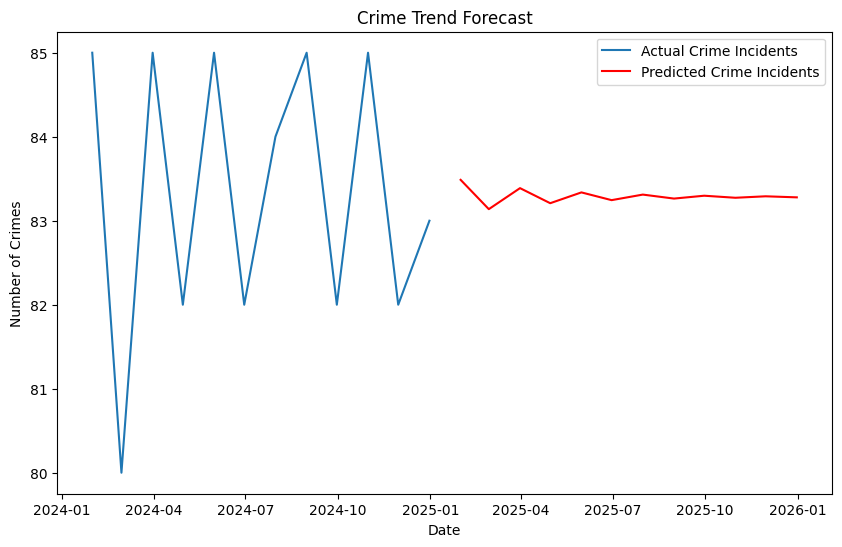

In [51]:
# Predicting Future Crime Trends with Time-Series Models
from statsmodels.tsa.arima.model import ARIMA

# Aggregate the data by month (you can also choose day or year)
crime_by_month = crime_data.resample('M', on='Date').size()

# Plot the time series data
plt.figure(figsize=(10,6))
plt.plot(crime_by_month, label='Monthly Crime Incidents')
plt.title('Crime Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

# Step 1: Fit ARIMA model
model = ARIMA(crime_by_month, order=(1, 1, 1))  # ARIMA(1, 1, 1) as an example
model_fit = model.fit()

# Step 2: Predict future crime trends (next 12 months as an example)
forecast = model_fit.forecast(steps=12)

# Plot the forecasted crime trends
plt.figure(figsize=(10,6))
plt.plot(crime_by_month, label='Actual Crime Incidents')
plt.plot(forecast, label='Predicted Crime Incidents', color='red')
plt.title('Crime Trend Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


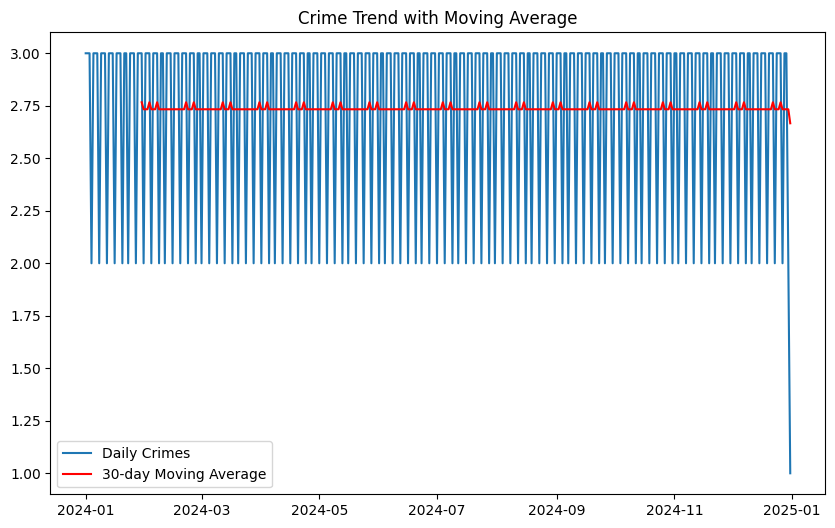

In [55]:
#  Time-Series Model for Crime Trend Prediction
# Here we will apply a simple model for time-series crime trend prediction
crime_data.set_index('Date', inplace=True)
crime_daily = crime_data.resample('D').size()

# Simple Moving Average (SMA) for prediction
crime_daily_sma = crime_daily.rolling(window=30).mean()

# Plot the time-series trend and the moving average
plt.figure(figsize=(10,6))
plt.plot(crime_daily, label='Daily Crimes')
plt.plot(crime_daily_sma, label='30-day Moving Average', color='red')
plt.title('Crime Trend with Moving Average')
plt.legend()
plt.show()

## Studying the most common types of weapons used in different types of crime.

C:\Users\pc\AppData\Local\Temp\ipykernel_16932\768973771.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weapon_usage = crime_data.groupby(['Crime_Type', 'Weapon_Used']).size().reset_index(name='Count')


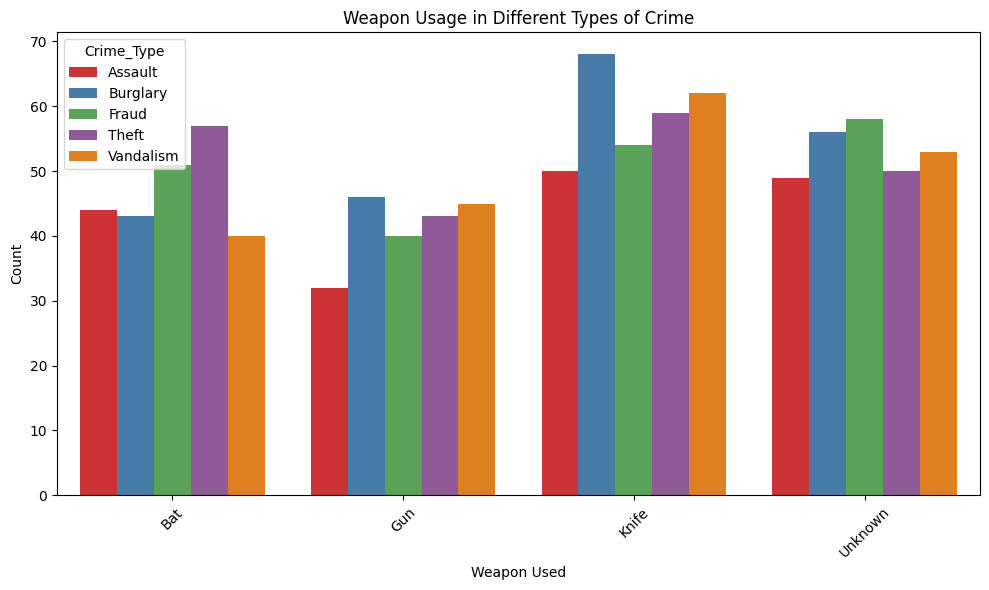

In [52]:
# Group by crime type and weapon used, then count occurrences
weapon_usage = crime_data.groupby(['Crime_Type', 'Weapon_Used']).size().reset_index(name='Count')

# Plot the most common weapons used in different crimes
plt.figure(figsize=(10, 6))
sns.barplot(x='Weapon_Used', y='Count', hue='Crime_Type', data=weapon_usage, palette='Set1')
plt.title('Weapon Usage in Different Types of Crime')
plt.xlabel('Weapon Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze the Most Frequent Weapons


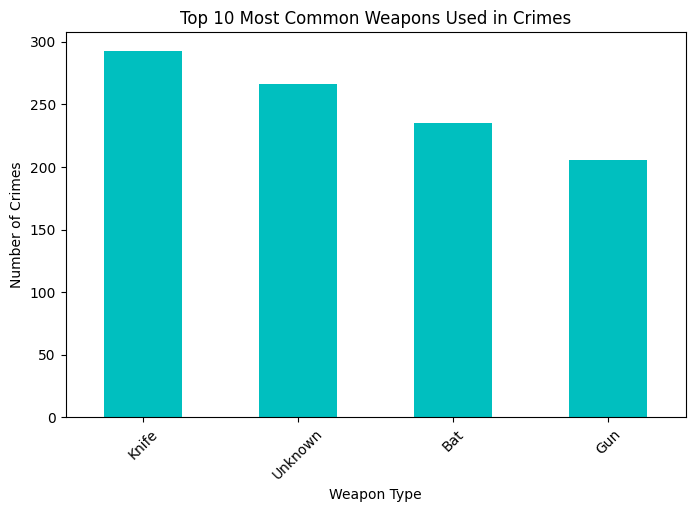

In [53]:
# Find the most common weapon used overall
most_common_weapons = crime_data['Weapon_Used'].value_counts()

# Plot the most common weapons
plt.figure(figsize=(8, 5))
most_common_weapons.head(10).plot(kind='bar', color='c')
plt.title('Top 10 Most Common Weapons Used in Crimes')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

## Heatmap of Crime Locations

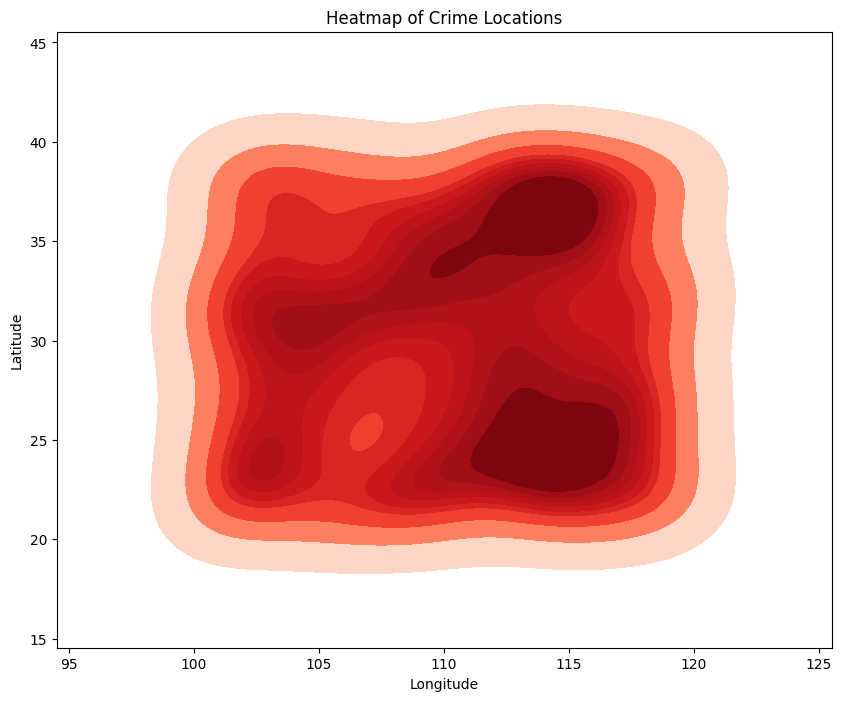

In [54]:
plt.figure(figsize=(10,8))
sns.kdeplot(x=crime_data['Longitude'], y=crime_data['Latitude'], cmap="Reds", fill=True)
plt.title('Heatmap of Crime Locations')
plt.show()

Using features like location, time, and suspect profiles, you can create a predictive model using algorithms like Random Forest or Logistic Regression to estimate future crime probabilities.

Train a model to classify incidents into crime types based on input features.

In [59]:
crime_data.columns

Index(['Crime_ID', 'Crime_Type', 'Location', 'Time', 'Victim_Age',
       'Suspect_Age', 'Weapon_Used', 'Latitude', 'Longitude', 'Hour', 'Month',
       'Cluster', 'Crime_Type_Num'],
      dtype='object')

In [63]:
# Convert 'Time' from HH:MM to total minutes
def convert_time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

crime_data['Time'] = crime_data['Time'].apply(convert_time_to_minutes)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = crime_data[['Latitude', 'Longitude', 'Time','Victim_Age','Suspect_Age']]
#y = crime_data['Crime_Type']
y = crime_data['Crime_Type'].astype('category').cat.codes 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.2
              precision    recall  f1-score   support

           0       0.15      0.09      0.12        53
           1       0.23      0.30      0.26        63
           2       0.23      0.19      0.21        64
           3       0.23      0.23      0.23        66
           4       0.13      0.17      0.15        54

    accuracy                           0.20       300
   macro avg       0.20      0.20      0.19       300
weighted avg       0.20      0.20      0.20       300



## Checking for Feature Importance through RandomForest

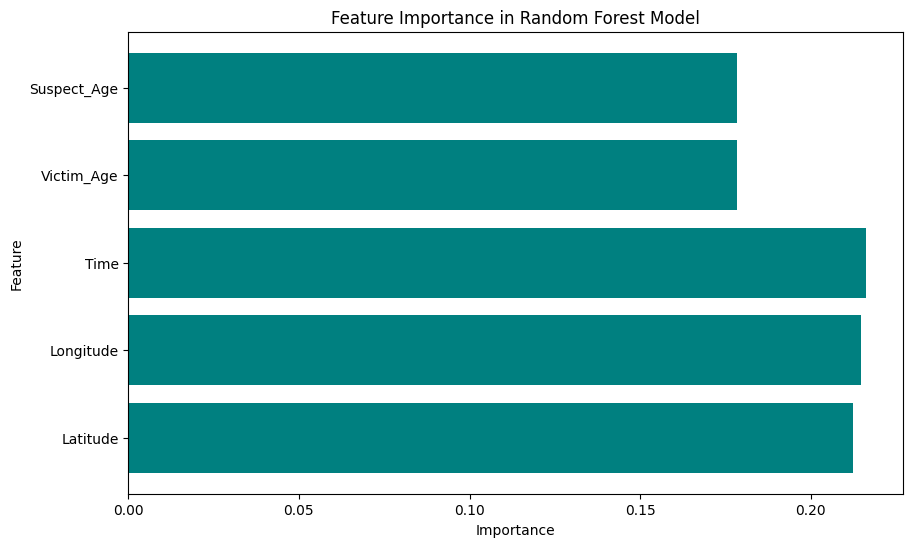

In [66]:
importances = rf_model.feature_importances_
features = X.columns

# Create a plot of feature importance
plt.figure(figsize=(10,6))
plt.barh(features, importances, color='teal')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
